In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


def get_features_cat_classification(df, target_col, normalize=False, mi_threshold=0.0):
    if target_col not in df.columns:
        print(f"Target column '{target_col}' not found in dataframe.")
        return None
    
    if not isinstance(df[target_col].dtype, pd.CategoricalDtype):
        print(f"Target column '{target_col}' is not categorical.")
        return None
    
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)
    
    if not categorical_cols:
        print("No categorical columns found in the dataframe.")
        return None
    
    le = LabelEncoder()
    X = df[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
    y = le.fit_transform(df[target_col].astype(str))
    
    mi_scores = mutual_info_classif(X, y, discrete_features=True)
    mi_scores_dict = dict(zip(categorical_cols, mi_scores))
    
    if normalize:
        total_mi = sum(mi_scores)
        if not (0 <= mi_threshold <= 1):
            print("mi_threshold should be between 0 and 1 when normalize is True.")
            return None
        mi_scores_dict = {k: v / total_mi for k, v in mi_scores_dict.items()}
    
    selected_columns = [col for col, mi in mi_scores_dict.items() if mi >= mi_threshold]
    
    if selected_columns:
        print(f"Columns passing the mutual information threshold: {selected_columns}")
    else:
        print("No columns meet the mutual information threshold.")
    
    return selected_columns


def plot_features_cat_classification(df, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    if not isinstance(df, pd.DataFrame):
        print("El dataframe proporcionado en realidad no es un dataframe")
        return None
    
    if target_col == "":
        print("Especifica una columna")
        return None
    
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no esta en el datarame")
        return None

    if not isinstance(df[target_col].dtype, pd.CategoricalDtype):
        df[target_col] = df[target_col].astype('category')
    
    if not columns:
        columns = df.select_dtypes(include=['category', 'object']).columns.tolist()
        if target_col in columns:
            columns.remove(target_col)
    
    if not all(col in df.columns for col in columns):
        print("Comprueba que todas las columnas espeficadas esten en el dataframe")
        return None
    
    selected_columns = get_features_cat_classification(df, target_col, normalize, mi_threshold)
    
    if not selected_columns:
        print("Ninguna columna cumple con la condicion de la informacion mutua")
        return None
    
    for col in selected_columns:
        plt.figure(figsize=(10, 6))
        df.groupby([col, target_col]).size().unstack().plot(kind='bar', stacked=True)
        plt.title(f'Distribucion de {target_col} con {col}')
        plt.xlabel(col)
        plt.ylabel('Contador')
        plt.legend(title=target_col)
        plt.show()
        


In [2]:
data=pd.read_csv('./data/titanic.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Columns passing the mutual information threshold: ['embarked', 'class', 'who', 'deck', 'embark_town', 'alive']


<Figure size 1000x600 with 0 Axes>

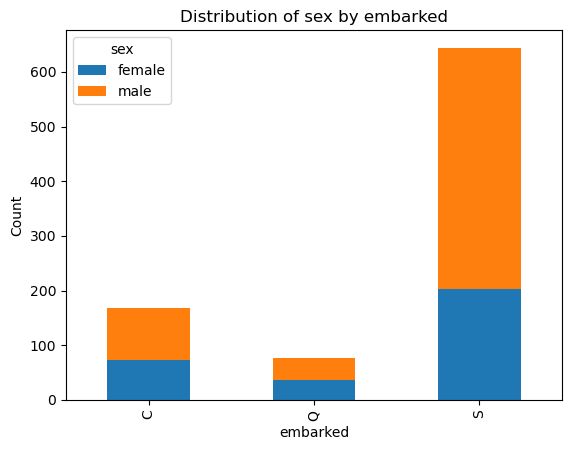

<Figure size 1000x600 with 0 Axes>

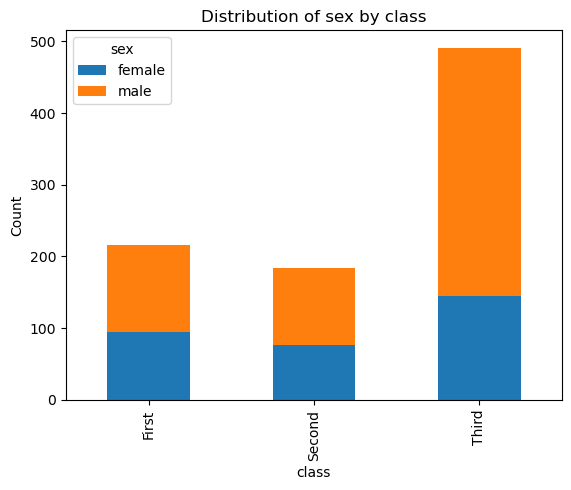

<Figure size 1000x600 with 0 Axes>

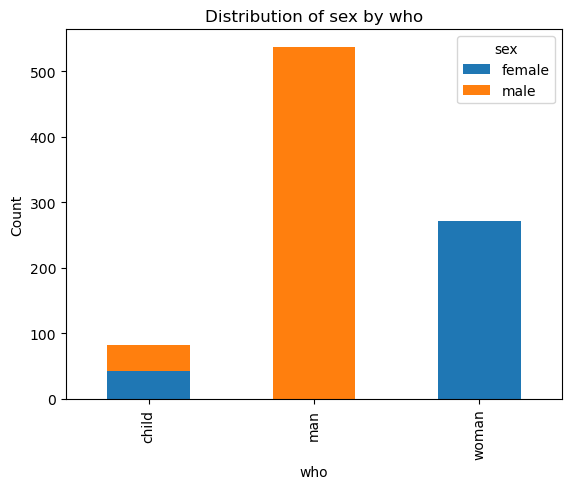

<Figure size 1000x600 with 0 Axes>

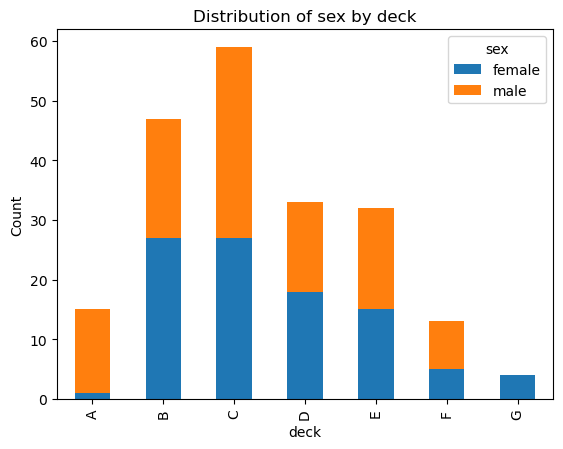

<Figure size 1000x600 with 0 Axes>

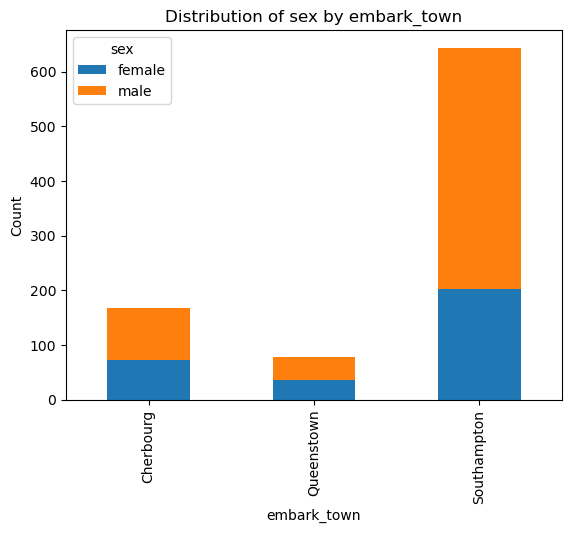

<Figure size 1000x600 with 0 Axes>

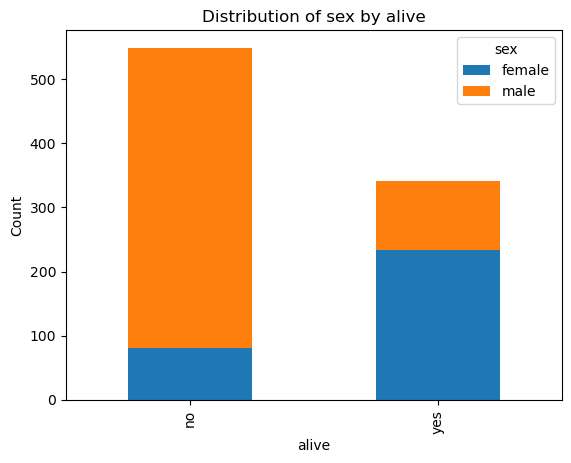

In [5]:
plot_features_cat_classification(data, "sex")